# Model Comparison Mini Project - California Housing

This project will compare the performance of various models on the task of prediciting the value of a real estate property as observed in the popular California Housing Data Set. 

To limit the scope of this project we shall be using a pre-cleaned dataset that does not show any missing value or null values. 

Any other data preprocessing such as scaling however is not performed. 

In [0]:
#importing required libraries

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib as plt

#importing required models and model methods as required
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import graphviz

In [0]:
#getting data
# I have combined the classicially available test and training sets into a single dataframe
# I have done this so during splitting I can shuffle the data as per my needs to tune performance
# the .append function can be used to combine the two sets available in sklearn library
# When using colab, the data sets are available in the Sample Data repo under the Files section of your notebook

df = pd.read_csv("california_housing_full.csv")

In [144]:
#let's take a look at the data
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
Unnamed: 0            20000 non-null int64
longitude             20000 non-null float64
latitude              20000 non-null float64
housing_median_age    20000 non-null float64
total_rooms           20000 non-null float64
total_bedrooms        20000 non-null float64
population            20000 non-null float64
households            20000 non-null float64
median_income         20000 non-null float64
median_house_value    20000 non-null float64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


In [146]:
df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7449.500000,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,5179.978268,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,2499.750000,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,6999.500000,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,11999.250000,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,16999.000000,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
#defining features
x = df.iloc[:,:-1]
#defining targets
y = df.iloc[:,-1:]

#splitting the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 30)

In [25]:
#Fitting Linear Regressor

LR = LinearRegression()
LR.fit(xtrain,ytrain)


traininglossLR = LR.score(xtrain,ytrain)
testinglossLR = LR.score(xtest,ytest)
print(traininglossLR)
print(testinglossLR)

#print(LR.get_params())

0.6388938078906676
0.6518185676146591
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [41]:
#Using Ridge Regression (L2 regularisation)
from sklearn.linear_model import Ridge

ridgeLR = Ridge(alpha = 1)
ridgeLR.fit(xtrain,ytrain)


traininglossridgeLR = ridgeLR.score(xtrain,ytrain)
testinglossridgeLR = ridgeLR.score(xtest,ytest)

print(traininglossridgeLR)
print(testinglossridgeLR)

0.6388938053782709
0.6518172539668234


In [43]:
from sklearn.linear_model import Lasso

lassoLR = Ridge(alpha = 1)
lassoLR.fit(xtrain,ytrain)

traininglosslassoLR = lassoLR.score(xtrain,ytrain)
testinglosslassoLR = lassoLR.score(xtest,ytest)

print(traininglosslassoLR)
print(testinglosslassoLR)


0.6388938053782709
0.6518172539668234


**Analysis on using Linear Regression**

**Vanilla version of LR -**

Training loss : 0.6388938079

Testing loss  : 0.6518185676146591


**Ride Regression L2 -**
 
0.6388938053782709

0.6518172539668234


**Lasso Regression l1 -**

0.6388938053782709

0.6518172539668234


**Analysis -**

Although linear regression does not fit the data very well, it will not show high degree of variance, that is if we retrain the model on the same data on each such training iteration the model will perform almost the same. 

However complex models will although fit the data better, they will show high degree of variance that is the will perform differently after re-training on same data and also if the data changes slightly. 

Below is an example


# Using Ransac Regressor

RANSAC (RANdom SAmple Consensus) algorithm.

RANSAC is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete data set. More information can be found in the general documentation of linear models.

**We are going to run Ransac multiple times and record observations**



In [78]:
from sklearn.linear_model import RANSACRegressor

ransacR = RANSACRegressor()
ransacR.fit(xtrain, ytrain)

#ransacR.score(xtrain,ytrain)
traininglossransacR = ransacR.score(xtrain,ytrain)
testinglossransacR = ransacR.score(xtest,ytest)

print(traininglossransacR)
print(testinglossransacR)

0.38215269021569
0.7119229578158638


**Observations**

Iteration 1 - 

0.40279365680595725

0.5978635223695535

Iteration 2 - 

0.4895082652701116


0.6170210282185535

Iteration 3 - **Best fit**

0.5582286892065771

0.767279356068632

Iteration 4 - 

0.41852707293959845

0.6489107521146353

Accuracy of saved and loaded model
0.7119229578158638

# Saving Models
When working with complex models, its better to save the best model for later use.

In [0]:
#saving the model using pickle

import pickle

filename = 'finalized_model.sav'
pickle.dump(ransacR, open(filename, 'wb'))

In [83]:
#Loading and using a pre-saved model

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7119229578158638


# **Using one of the most complex models**

The magic with decision trees is that although this algorithm fits the data very optimistically we have the capability to prune the tree and prevent it from overfitting data to our own liking. Meaning we have the ability to define how complex we want the model to be.

In [95]:
dtree = DecisionTreeRegressor(max_depth = 15)
dtree.fit(xtrain,ytrain)

#ransacR.score(xtrain,ytrain)
traininglossdtree = dtree.score(xtrain,ytrain)
testinglossdtree = dtree.score(xtest,ytest)

print(traininglossdtree)
print(testinglossdtree)

0.9561743947897237
0.6980553120732594


**Analysis of Dtree**

Iteration 1 - 


1.0

0.1992289373083762

This means that the tree is showing no training loss, means it fits the training data 100% but performs very poorly on test data, this is another way of detecting variance.

---

Iteration 2 -

0.9997253857001949

0.4521182121500316

When we reduced the complexity of the tree to a max depth of 25 levels immediately we see a drop in ability to fit data but we see a substantial increase in ability to predict test data, this is the justification that variance has reduced in our model

---


Iteration 3- max depth 15

0.9557919969594201

0.7201287095240858


By reduct depth of tree to 15, we have marginally reduced the training accuracy but signifianctly gained prediction accuracy. This is a good tradeoff

---


**THE DEVIL OF DATA**

Now i re-split the data by executing the train test split method above, the same model that was giving us excellent result of ~71% now performs poorly on new data.

0.9561743947897237

0.6980553120732594


**let's save the current model and test if on different data**

I will save the model
Run the split again
Import the saved model 
Test it on the new data
Asses results

In [0]:
filename = 'dtree.sav'
pickle.dump(dtree, open(filename, 'wb'))



In [103]:
loaded_dtree = pickle.load(open(filename, 'rb'))
result = loaded_dtree.score(xtest, ytest)
print(result)

0.9379607777538903


As you can see above that the exported model which was earlier performing poorly, is not giving accuracy of 0.9665740174940533 on test data.

--- 

On repeating the steps again the model gives an accuracy of 
0.9379607777538903

This is a problem of variance that complex models will show, they perform poorly or unpredictably when data changes, this can be a huge issue to compensate in production. 



Visualising your Dtrees

In [0]:
#sklearn has a plot_tree function to plot trees in terminal
#for larger trees without pruning, the execution will take 5-10mins
#if the tree is big then you won't be able to see individual node parameters
#for detailed visualisation you can use Graphviz library for quick results


print(plot_tree(dtree))

In [121]:
#using Graphviz
#these processes can take a long time to generate the tree, patience please


dot = export_graphviz(dtree,
                        out_file=None,
                        filled=True,
                        impurity=None,
                        )

graph = graphviz.Source(dot)
graph.render("dtree_render")

'dtree_render.pdf'

# Ensembling

Ensembling is the process of building many smaller models also known as stumps that fit a fragment of your data but working together can as an aggregated model output perform much better than a single complex model

--- 

Let's first try Gradient Boosting Ensembler

In [133]:
gbr = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.03)

gbr.fit(xtrain,ytrain)

#ransacR.score(xtrain,ytrain)
traininglossgbr = gbr.score(xtrain,ytrain)
testinglossgbr = gbr.score(xtest,ytest)

print(traininglossgbr)
print(testinglossgbr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8436330872295212
0.8201898250992561


**In here we do not know what the correct number of estimators or sub-models we want, hence let us cycle through a list with options**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6067953634273251


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7390212254837795


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7816154162537913


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7970717835245664


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8091488953687959


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8127816848585412


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8171649760612585


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8173587070462222


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8201898250992563


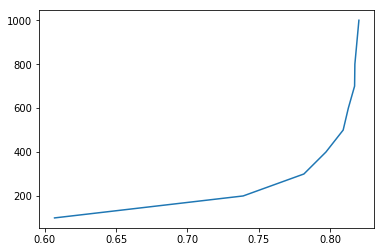

In [136]:
argumentlist = [100,200,300,400,500,600,700,800,1000]
scorelist = []

for i in argumentlist:
  gbr = GradientBoostingRegressor(n_estimators = i, learning_rate = 0.03)
  gbr.fit(xtrain,ytrain)  
  score_to_append = gbr.score(xtest,ytest)
  print(score_to_append)
  scorelist.append(score_to_append)
  
  
import matplotlib.pyplot as plt

plt.plot(scorelist, argumentlist, label='score')

The above plot gives us an understanding of how the score changes for each selection of estimators

In [143]:
#Now let's check variance of GBR by running split statement and then assesing score


#splitting the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 30)

print(gbr.score(xtest,ytest))

0.9189803433390424


Split 1 - 0.9253486080131357

Split 2 - 0.8967617652947449

Split 3 - 0.771234655801339

Split 4 - 0.9189803433390424

---

The model shows some variance as we change the data.